In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.lower().str.replace('-', '_')

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [7]:
df[features].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [8]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].str.strip()
df['diagnosis'] = (df['diagnosis'] == "M").astype(int)

In [11]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [12]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.diagnosis.values
y_val = df_val.diagnosis.values
y_test = df_test.diagnosis.values

In [17]:
del df_train['diagnosis']
del df_val['diagnosis']
del df_test['diagnosis']

In [18]:
def train_logistic_regression(c_val, features):
    dv = DictVectorizer(sparse=False)
    model = LogisticRegression(solver='liblinear', C=c_val, max_iter=1000, random_state=42)
    
    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    auc_pr = auc(recall, precision)
    
    return auc_pr

In [19]:
train_logistic_regression(1.0, features)

0.9875422576098678

In [20]:
c = [0.01, 0.1, 1, 10, 100]
for c_val in c:
    reg_acc = train_logistic_regression(c_val, features)
    print(c_val,':', reg_acc)

0.01 : 0.9802486493177565
0.1 : 0.9890815751200921
1 : 0.9875422576098678
10 : 0.9837760334565389
100 : 0.9824620939145535


DECISION TREE

In [30]:
def train_dt(depth_max=None, leaf_min=1):
    train_dicts = df_train[features].fillna(0).to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    dt = DecisionTreeClassifier(max_depth=depth_max, min_samples_leaf=leaf_min)
    dt.fit(X_train, y_train)
    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    y_pred = dt.predict_proba(X_val)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    auc_pr = auc(recall, precision)
    return auc_pr

In [24]:
train_dicts = df_train[features].fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
val_dicts = df_val[features].fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
y_pred = dt.predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_pred)
auc_pr = auc(recall, precision)
auc_pr

0.9328531677355866

In [31]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
dt_scores = []
for d in depths:
    score = train_dt(depth_max=d, leaf_min=1)
    dt_scores.append((d, score))
dt_scores

[(1, 0.9082934609250398),
 (2, 0.9285896617296344),
 (3, 0.9285896617296344),
 (4, 0.936544942974933),
 (5, 0.9265914291657998),
 (6, 0.9235446570972886),
 (10, 0.9235446570972886),
 (15, 0.9328531677355866),
 (20, 0.9146160856687173),
 (None, 0.9328531677355866)]

In [32]:
tuned_dt_scores = []
for d in [4,5,6]:
    for l in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=l)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_pred)
        auc_pr = auc(recall, precision)
        
        tuned_dt_scores.append((d, l, auc_pr))

In [33]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(tuned_dt_scores, columns=columns)

In [34]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.927  0.927  0.924
5                 0.952  0.908  0.932
10                0.915  0.939  0.939
15                0.969  0.963  0.968
20                0.964  0.974  0.963
100               0.912  0.906  0.912
200               0.693  0.693  0.693
500               0.693  0.693  0.693

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

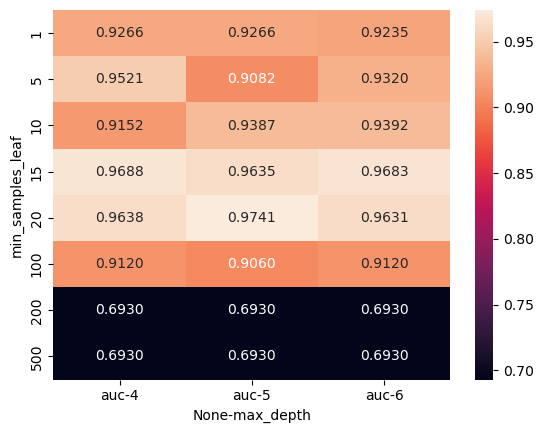

In [35]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".4f")

#### RANDOM FOREST

In [37]:
rf_scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    auc_pr = auc(recall, precision)
    
    rf_scores.append((n, auc_pr))

In [38]:
rf_scores

[(10, 0.9747088162532511),
 (20, 0.9789136695722507),
 (30, 0.9777443115692015),
 (40, 0.9783062169533129),
 (50, 0.9784248108857175),
 (60, 0.9799056393622576),
 (70, 0.9808706009909087),
 (80, 0.9806168251585606),
 (90, 0.9807408876824562),
 (100, 0.981509163164298),
 (110, 0.9807287269295546),
 (120, 0.9804251003572868),
 (130, 0.9805398233673635),
 (140, 0.9801544235360913),
 (150, 0.9799385275661193),
 (160, 0.9797289580063576),
 (170, 0.9799490855417772),
 (180, 0.9797437761452913),
 (190, 0.9797837797144296),
 (200, 0.9796556536410871)]

In [39]:
df_scores = pd.DataFrame(rf_scores, columns=['n_estimators', 'auc_pr'])

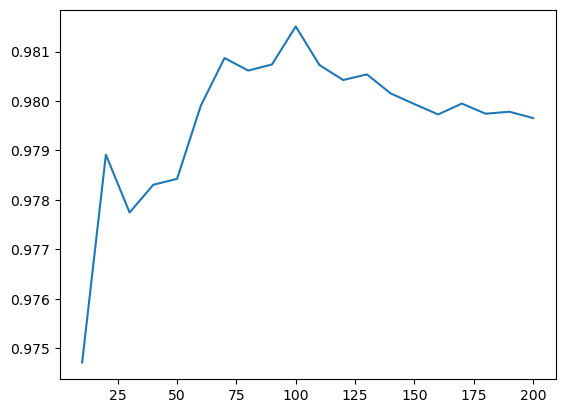

In [40]:
plt.plot(df_scores.n_estimators, df_scores.auc_pr)

In [41]:
df_scores[df_scores['auc_pr'] == df_scores['auc_pr'].max()]

,n_estimators,auc_pr
9,100,0.981509


In [42]:
tuned_rf_scores = []

for d in [5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_pred)
        auc_pr = auc(recall, precision)

        tuned_rf_scores.append((d, n, auc_pr))

In [45]:
columns = ['max_depth', 'n_estimators', 'auc_pr']
df_scores = pd.DataFrame(tuned_rf_scores, columns=columns)
df_scores

,max_depth,n_estimators,auc_pr
0,5,10,0.972384
1,5,20,0.975542
2,5,30,0.978027
3,5,40,0.979285
4,5,50,0.977901
...,...,...,...
75,20,160,0.979729
76,20,170,0.979949
77,20,180,0.979744
78,20,190,0.979784


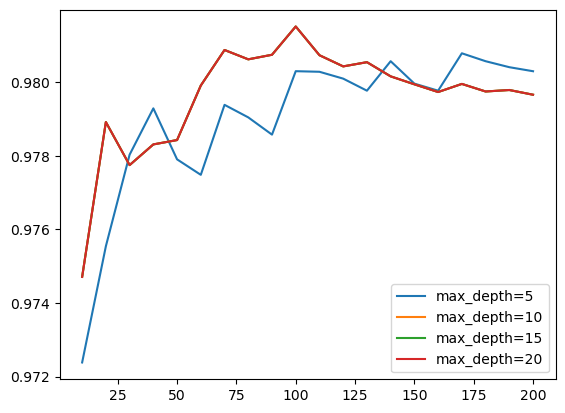

In [44]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc_pr,
             label='max_depth=%d' % d)

plt.legend()

In [46]:
max_depth = 20
n_estimator = 100

In [47]:
tuned_rf_scores_2 = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_pred)
        auc_pr = auc(recall, precision)

        tuned_rf_scores_2.append((s, n, auc_pr))

In [48]:
columns = ['min_samples_leaf', 'n_estimators', 'auc_pr']
df_scores = pd.DataFrame(tuned_rf_scores_2, columns=columns)

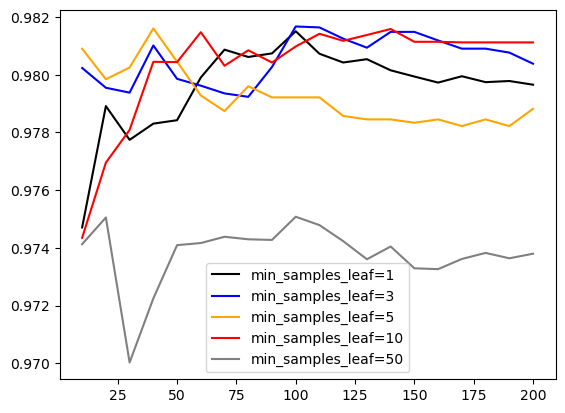

In [49]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc_pr,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

### GRADIENT BOOST

In [50]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [51]:
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
weight_ratio = neg_count / pos_count

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr', 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [52]:
y_pred = model.predict(dval)

In [53]:
precision, recall, _ = precision_recall_curve(y_val, y_pred)
auc_pr = auc(recall, precision)
auc_pr

0.9803924105225932

In [54]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [55]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr', 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [57]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc_pr', 'val_auc_pr']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [65]:
eta_scores = {}

In [67]:
key1 = 'eta=%s' % (xgb_params['eta'])
eta_scores[key1] = parse_xgb_output(output)

In [68]:
s = output.stdout

In [69]:
print(s[:200])

[0]	train-aucpr:0.99750	val-aucpr:0.92492
[5]	train-aucpr:1.00000	val-aucpr:0.97845
[10]	train-aucpr:1.00000	val-aucpr:0.97865
[15]	train-aucpr:1.00000	val-aucpr:0.97906
[20]	train-aucpr:1.00000	val-a


In [70]:
df_score = parse_xgb_output(output)

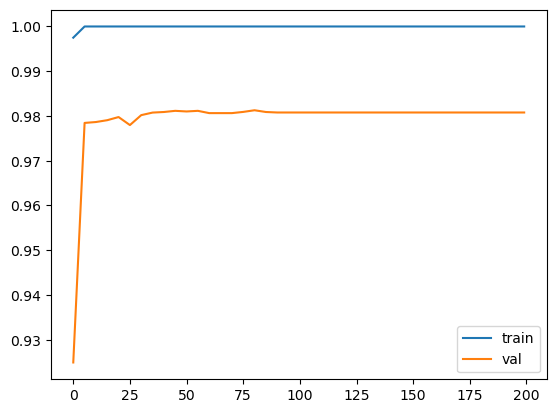

In [71]:
plt.plot(df_score.num_iter, df_score.train_auc_pr, label='train')
plt.plot(df_score.num_iter, df_score.val_auc_pr, label='val')
plt.legend()

In [72]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [73]:
key2 = 'eta=%s' % (xgb_params['eta'])
eta_scores[key2] = parse_xgb_output(output)

In [74]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [75]:
key3 = 'eta=%s' % (xgb_params['eta'])
eta_scores[key3] = parse_xgb_output(output)

In [76]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
key4 = 'eta=%s' % (xgb_params['eta'])
eta_scores[key4] = parse_xgb_output(output)

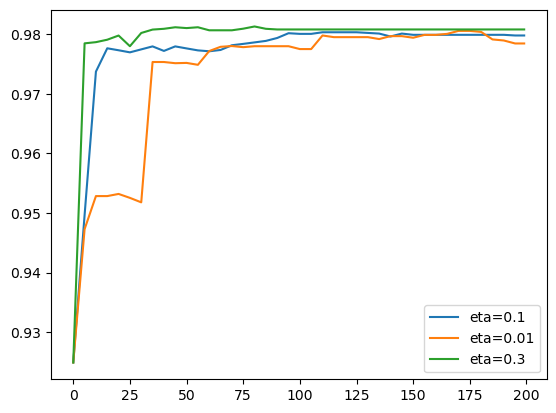

In [78]:
etas = ['eta=0.1', 'eta=0.01', 'eta=0.3']
for eta in etas:
    df_score = eta_scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc_pr, label=eta)
    plt.legend()

#### TUNE MAX_DEPTH

In [111]:
depth_scores = {}

In [112]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [113]:
key1 = 'max_depth=%s' % (xgb_params['max_depth'])
depth_scores[key1] = parse_xgb_output(output)

In [114]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [115]:
key2 = 'max_depth=%s' % (xgb_params['max_depth'])
depth_scores[key2] = parse_xgb_output(output)

In [116]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [117]:
key3 = 'max_depth=%s' % (xgb_params['max_depth'])
depth_scores[key3] = parse_xgb_output(output)

In [118]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [119]:
key4 = 'max_depth=%s' % (xgb_params['max_depth'])
depth_scores[key4] = parse_xgb_output(output)

dict_items([('max_depth=3',     num_iter  train_auc_pr  val_auc_pr
0          0       0.95188     0.95572
1          5       0.99346     0.97610
2         10       0.99380     0.97658
3         15       0.99380     0.97658
4         20       0.99380     0.97658
5         25       0.99380     0.97658
6         30       0.99380     0.97658
7         35       0.99380     0.97658
8         40       0.99380     0.97658
9         45       0.99380     0.97658
10        50       0.99380     0.97658
11        55       0.99380     0.97658
12        60       0.99380     0.97658
13        65       0.99380     0.97658
14        70       0.99380     0.97658
15        75       0.99380     0.97658
16        80       0.99380     0.97658
17        85       0.99380     0.97658
18        90       0.99380     0.97658
19        95       0.99380     0.97658
20       100       0.99380     0.97658
21       105       0.99380     0.97658
22       110       0.99380     0.97658
23       115       0.99380     0.976

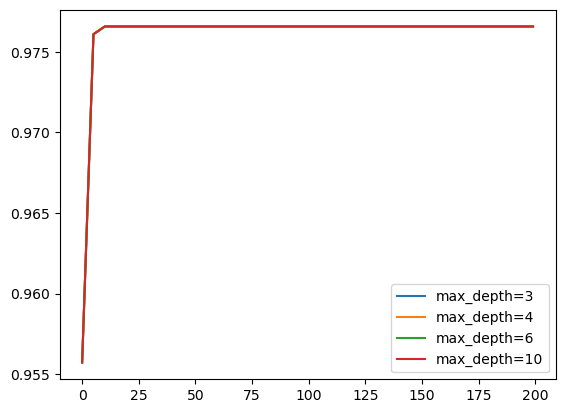

In [120]:
print(depth_scores.items())
for max_depth, df_score in depth_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc_pr, label=max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()

In [95]:
cw_scores = {}

In [121]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [122]:
key1 = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
cw_scores[key1] = parse_xgb_output(output)

In [123]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [124]:
key2 = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
cw_scores[key2] = parse_xgb_output(output)

In [125]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [126]:
key3 = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
cw_scores[key3] = parse_xgb_output(output)

In [127]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [128]:
key4 = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
cw_scores[key4] = parse_xgb_output(output)

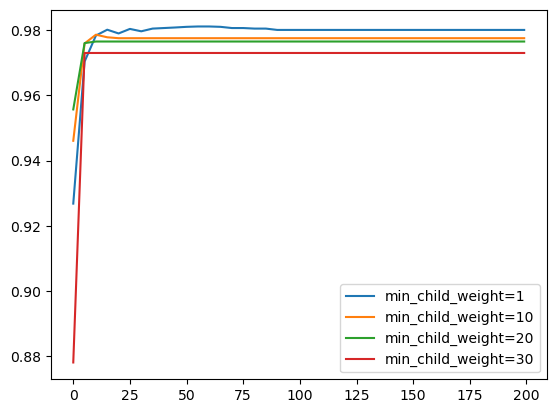

In [129]:
for min_child_weight, df_score in cw_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc_pr, label=min_child_weight)
plt.legend()

### CHOOSING THE BEST MODEL

#### Logistic Regression

In [105]:
train_logistic_regression(0.1, features)

0.9890815751200921

#### Decision Tree

In [106]:
train_dt(5,20)

0.9741449180803248

#### Random Forest

In [110]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=20,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_pred)
auc_pr = auc(recall, precision)
auc_pr

0.9816738206165627

#### Gradient Boost

In [130]:
final_xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': weight_ratio, 
}

model = xgb.train(final_xgb_params, dtrain, num_boost_round=200)

y_pred = model.predict(dval)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
auc_pr = auc(recall, precision)
auc_pr

0.9801390636169012

### FINAL MODEL - RANDOM FOREST

In [131]:
df_full_train = df_full_train.reset_index(drop=True)

In [133]:
y_full_train = df_full_train.diagnosis.values

In [134]:
del df_full_train['diagnosis']

In [135]:
train_dicts = df_full_train[features].fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(train_dicts)

In [136]:
test_dicts = df_test[features].fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [138]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=20,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)
auc_pr

0.9960149524992233